In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [3]:
# Dataframe
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from textwrap import wrap

**Importing book dataset**

In [4]:
goodreads_book1 = pd.read_excel('hybrid_dataset.xlsx') #book dataset

In [5]:
len(goodreads_book1)

24015

In [6]:
goodreads_book1.head()

Unnamed: 0  ...                                          topicname
0           0  ...  life thing find time want dream job way chance...
1           1  ...  world secret life death find time monster myst...
2           2  ...  game history world journalism first ruining st...
3           3  ...  life thing find time want dream job way chance...
4           4  ...  life thing find time want dream job way chance...

[5 rows x 17 columns]

In [7]:
goodreads_book1=goodreads_book1.drop('Unnamed: 0',axis=1)

**Importing Review dataset**

In [8]:
goodreads_review1 = pd.read_excel('review_dataset.xlsx')#review dataset

In [9]:
goodreads_review1.head()

Unnamed: 0  ...                                        review_text
0           0  ...  A beautiful story. It is rare to encounter a b...
1           1  ...  This book takes us into the crazy world of Nor...
2           2  ...  Wow. Amazing story, and well told - kept me up...
3           3  ...                                  Kareem recommends
4           4  ...  My safari guide gave this to me, saying the au...

[5 rows x 6 columns]

In [10]:
goodreads_review1= goodreads_review1.drop('Unnamed: 0',axis=1)

In [11]:
goodreads_book2=goodreads_book1

In [12]:
review=pd.merge(goodreads_review1, goodreads_book2,on='book_id',how='left')
review.dropna(subset=['title'], inplace=True)
review.shape

(90424, 20)

In [13]:
review=review[['user_id','book_id','title','rating']]

#**Content Based Recommendation**

### Content Based on Title, Authors, Genres and Topic Name

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
import random
from PIL import Image
import requests
from io import BytesIO

In [15]:
goodreads_book2['soup'] = goodreads_book2.apply(lambda x: (str(x['title']) +' ' +str(x['author_name'])+' ' + str(x['genres_book'])+' ' + str(x['topicname'])+' ' + str(x['processed'])), axis=1)

In [16]:
goodreads_book2['soup']

0        All the Light We Cannot See Anthony Doerr fict...
1        The Orphan Master's Son Adam Johnson fiction w...
2        Unbroken: A World War II Story of Survival, Re...
3        Drive: The Surprising Truth About What Motivat...
4        The Worlds of a Maasai Warrior: An Autobiograp...
                               ...                        
24010    Blood-Drenched Beard Daniel Galera fiction wor...
24011    Collateral Damage (Hidden Scars, #2) A.M. Myer...
24012    Untouched (Untouched #1) Lilly Wilde romance w...
24013    Naked Me Christian Winn fiction war country am...
24014    Sadly Beautiful Jason Fisk poetry cancel paran...
Name: soup, Length: 24015, dtype: object

In [17]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(goodreads_book2['soup'])

**Cosine Similarity**

Using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two books. Mathematically, it is defined as follows:

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $

In [18]:
#calculate the cosine similarities and return books that are most similar.
cosine_sim = cosine_similarity(count_matrix,count_matrix)

In [19]:
indices = pd.Series(goodreads_book2.index, index=goodreads_book2['title'])
#titles = goodreads_book2[['title','image_url']]

In [20]:
def get_recommendations(title,n=6):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    print(sim_scores)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    book_indices = [i[0] for i in sim_scores]
    
    # Top 5 book recommendation
    rec = goodreads_book2[['title', 'image_url']].iloc[book_indices] 
    temp=rec.head(n)
    plt.figure(figsize=(20,20)) # specifying the overall grid size   

    tt=[]
    for i in temp['title']:
      tt.append(i)
      
    img_array=[]
    for i in temp['image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        img_array.append(img)


    for i in range(len(img_array)):
        plt.subplot(6,6,i+1)    # the number of images in the grid is 5*5 (25)
        label='\n'.join(wrap(tt[i], 20))
        plt.xlabel(label)
        plt.imshow(img_array[i])
 
    plt.show()   
    
# It reads the top 5 recommended book urls and print the images
        
    titleslist=pd.DataFrame(temp['title'])
    return titleslist
    

[(0, 0.06837360072401144), (1, 0.05601004363575274), (2, 0.045762942565913345), (3, 0.08376794774158472), (4, 0.05481190680180863), (5, 0.009949232977126972), (6, 0.057332594489514686), (7, 0.04222505122165727), (8, 0.02474672675165749), (9, 0.052621922763015826), (10, 0.1000627753246591), (11, 0.10140054977499117), (12, 0.11861676044153857), (13, 0.03890991673420968), (14, 0.03467701223423522), (15, 0.01710985646950936), (16, 0.03862932048266011), (17, 0.06638951569263125), (18, 0.04261307398782349), (19, 0.03473764399919092), (20, 0.027445370896646858), (21, 0.039968982860259794), (22, 0.041915712745939214), (23, 0.009367364684505884), (24, 0.01922039995173596), (25, 0.011579214666396977), (26, 0.03559214727390171), (27, 0.025111458750274516), (28, 0.0811101593074724), (29, 0.025122127540525077), (30, 0.0372748108825042), (31, 0.03400947431864889), (32, 0.037667188125411775), (33, 0.029875282061684064), (34, 0.006057519681202096), (35, 0.021804922689897834), (36, 0.030870346617670685

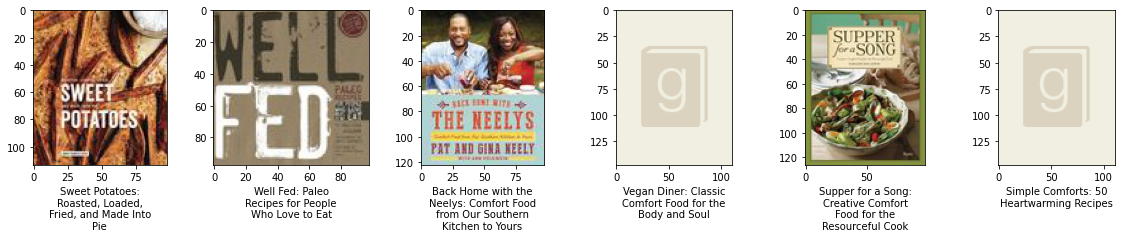

title
23317  Sweet Potatoes: Roasted, Loaded, Fried, and Ma...
7232   Well Fed: Paleo Recipes for People Who Love to...
20170  Back Home with the Neelys: Comfort Food from O...
19570  Vegan Diner: Classic Comfort Food for the Body...
352    Supper for a Song: Creative Comfort Food for t...
7031            Simple Comforts: 50 Heartwarming Recipes

In [21]:
get_recommendations("Carla's Comfort Foods: Favorite Dishes from Around the World")

**What if we want a specific book but can't remember it's full name?**

In [22]:
def get_name_from_partial(title):
    return list(goodreads_book2.title[goodreads_book2.title.str.lower().str.contains(title) == True].values)

In [23]:
title = "kids"
l = get_name_from_partial(title)
list(enumerate(l))

[(0,
  'Selfish, Shallow, and Self-Absorbed: Sixteen Writers on The Decision Not To Have Kids'),
 (1,
  'Mindful Parenting: Simple and Powerful Solutions for Raising Creative, Engaged, Happy Kids in Today’s Hectic World'),
 (2, 'Maker Projects for Kids Who Love Games'),
 (3, 'Heck: Where the Bad Kids Go'),
 (4, 'Sitting Still Like a Frog: Mindfulness Exercises for Kids'),
 (5,
  "Please Don't Bite the Baby (and Please Don't Chase the Dogs): Keeping Our Kids and Our Dogs Safe and Happy Together"),
 (6, 'Give Them Grace: Dazzling Your Kids with the Love of Jesus'),
 (7,
  'Clay Lab for Kids: 52 Projects to Make, Model, and Mold with Air-Dry, Polymer, and Homemade Clay'),
 (8, 'Bailey School Kids [6 Books Set]'),
 (9, 'Screenwise: Helping Kids Thrive (and Survive) in Their Digital World'),
 (10, 'Monochrome Kids'),
 (11, "Fodor's Disneyland and Southern California with Kids"),
 (12,
  "The Door in the Dragon's Throat (The Cooper Kids Adventure Series, #1)"),
 (13, 'If Kids Ruled the World

In [24]:
l[22]

"Motivate Your Child: A Christian Parent's Guide to Raising Kids Who Do What They Need to Do Without Being Told"

[(0, 0.11113439244418016), (1, 0.04168613117187251), (2, 0.02987684749898952), (3, 0.18577632898093627), (4, 0.11125746489877432), (5, 0.02776812451985564), (6, 0.057947531670752804), (7, 0.0907876350826437), (8, 0.11401644620320173), (9, 0.0718015512833393), (10, 0.11316959205959624), (11, 0.0712758500831081), (12, 0.14713652272513247), (13, 0.10135706485001492), (14, 0.11829020784277439), (15, 0.014149123479001578), (16, 0.0696977559712141), (17, 0.09058715389683203), (18, 0.13592262667174393), (19, 0.08139190275335063), (20, 0.07943653989879196), (21, 0.07627534296850065), (22, 0.07326394460261555), (23, 0.02711244243371469), (24, 0.08174290196690713), (25, 0.028726553912947282), (26, 0.12803438420890695), (27, 0.011680935858002178), (28, 0.1326248790486), (29, 0.09348718872469818), (30, 0.08862096362245575), (31, 0.02531194970590338), (32, 0.03893645286000725), (33, 0.09882234970563494), (34, 0.06011173320960196), (35, 0.05409523057179008), (36, 0.06564462039263615), (37, 0.0399714

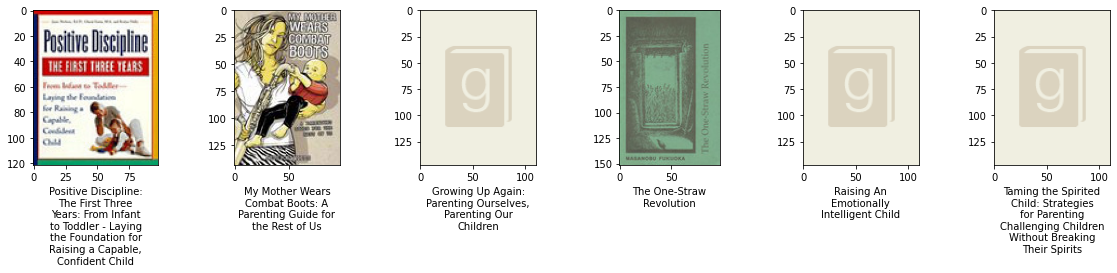

title
18908  Positive Discipline: The First Three Years: Fr...
20382  My Mother Wears Combat Boots: A Parenting Guid...
11816  Growing Up Again: Parenting Ourselves, Parenti...
6694                            The One-Straw Revolution
12766           Raising An Emotionally Intelligent Child
15448  Taming the Spirited Child: Strategies for Pare...

In [25]:
get_recommendations(l[22])

## Content Based on Popularity and Ratings

In [26]:
v = goodreads_book2['ratings_count']
m = goodreads_book2['ratings_count'].quantile(0.95)
R = goodreads_book2['average_rating'].astype(float)
C = goodreads_book2['average_rating'].mean()
goodreads_book2['weighted_rating'] = (R*v + C*m) / (v + m) # creating new column weighted rating

In [27]:
goodreads_book2.head()

book_id  ...  weighted_rating
0  19398490  ...         4.288818
1  12969594  ...         4.009480
2   8664353  ...         4.387199
3   6452796  ...         3.947538
4    178186  ...         3.895581

[5 rows x 18 columns]

In [28]:
#take the top 30 movies based on similarity scores and calculate the vote of the 60th percentile book. Then, using this as the value of m, we will calculate the weighted rating of each book
def improved_recommendations(title, n=6):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    book_indices = [i[0] for i in sim_scores]
    df = goodreads_book2.iloc[book_indices][['title', 'ratings_count', 'average_rating', 'weighted_rating','image_url']]

    v = df['ratings_count']
    m = df['ratings_count'].quantile(0.60)
    R = df['average_rating']
    C = df['average_rating'].mean()
    df['weighted_rating'] = (R*v + C*m) / (v + m)
    
    qualified = df[df['ratings_count'] >= m]
    qualified = qualified.sort_values('weighted_rating', ascending=False)

    temp=qualified.head(n)
    plt.figure(figsize=(20,20)) # specifying the overall grid size   

    tt=[]
    for i in temp['title']:
      tt.append(i)
      
    img_array=[]
    for i in temp['image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content)) #image display
        img_array.append(img)
      

    for i in range(len(img_array)):
       plt.subplot(6,6,i+1)    # the number of images in the grid is 5*5 (25)
       label='\n'.join(wrap(tt[i], 20))
       plt.xlabel(label)
       plt.imshow(img_array[i])
    plt.show()   

    return qualified[['title', 'ratings_count', 'average_rating', 'weighted_rating']].head(n)

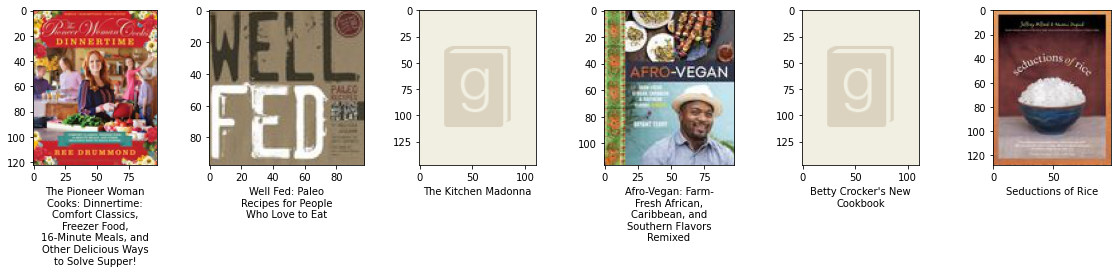

title  ...  weighted_rating
1796   The Pioneer Woman Cooks: Dinnertime: Comfort C...  ...         4.332880
7232   Well Fed: Paleo Recipes for People Who Love to...  ...         4.233290
11526                                The Kitchen Madonna  ...         4.197803
12203  Afro-Vegan: Farm-Fresh African, Caribbean, and...  ...         4.167037
19027                       Betty Crocker's New Cookbook  ...         4.142420
15018                                 Seductions of Rice  ...         4.115702

[6 rows x 4 columns]

In [29]:
improved_recommendations("Carla's Comfort Foods: Favorite Dishes from Around the World")

In [30]:
l[22]

"Motivate Your Child: A Christian Parent's Guide to Raising Kids Who Do What They Need to Do Without Being Told"

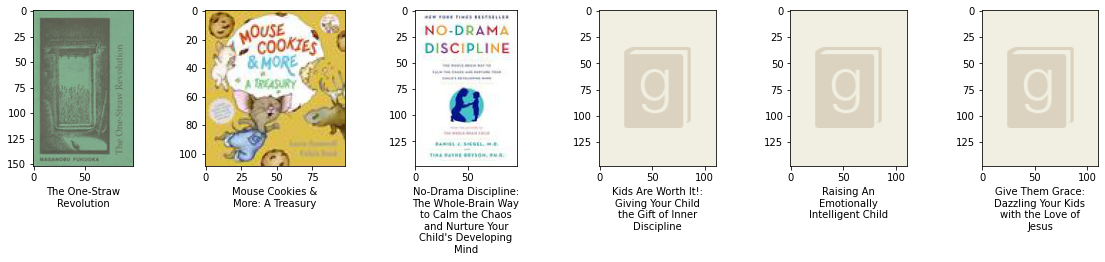

title  ...  weighted_rating
6694                            The One-Straw Revolution  ...         4.353335
12297                   Mouse Cookies & More: A Treasury  ...         4.321008
6901   No-Drama Discipline: The Whole-Brain Way to Ca...  ...         4.224273
11086  Kids Are Worth It!: Giving Your Child the Gift...  ...         4.154782
12766           Raising An Emotionally Intelligent Child  ...         4.117188
5464   Give Them Grace: Dazzling Your Kids with the L...  ...         4.007506

[6 rows x 4 columns]

In [31]:
improved_recommendations(l[22])

#**Collaborative Filtering** 

# (user based)

In [32]:
!pip install scikit-surprise #using surprise python library for svd

In [33]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate  

In [34]:
reader = Reader()
data = Dataset.load_from_df(review[['user_id', 'book_id', 'rating']], reader)

In [35]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'])  #predicting review model

{'fit_time': (5.05448579788208,
  5.040058851242065,
  5.057027101516724,
  5.1530375480651855,
  5.065619707107544),
 'test_mae': array([0.82442698, 0.83376488, 0.82294866, 0.83386925, 0.83241579]),
 'test_rmse': array([1.08974922, 1.09858135, 1.08285646, 1.0996975 , 1.10144357]),
 'test_time': (0.176436185836792,
  0.14661526679992676,
  0.1425473690032959,
  0.14848589897155762,
  0.14616823196411133)}

In [36]:
#We get a mean Root Mean Sqaure Error of about 0.8302 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.
trainset = data.build_full_trainset()
svd.fit(trainset);

In [37]:
#rating user 8842281e1d1347389f2ab93d60773d4d has given to books
review[review['user_id'] == '8842281e1d1347389f2ab93d60773d4d']

user_id  ...  rating
0  8842281e1d1347389f2ab93d60773d4d  ...       4
1  8842281e1d1347389f2ab93d60773d4d  ...       3
2  8842281e1d1347389f2ab93d60773d4d  ...       5
3  8842281e1d1347389f2ab93d60773d4d  ...       3
4  8842281e1d1347389f2ab93d60773d4d  ...       5
5  8842281e1d1347389f2ab93d60773d4d  ...       4
6  8842281e1d1347389f2ab93d60773d4d  ...       4

[7 rows x 4 columns]

In [38]:
svd.predict('8842281e1d1347389f2ab93d60773d4d','6452796')  

Prediction(uid='8842281e1d1347389f2ab93d60773d4d', iid='6452796', r_ui=None, est=3.851376708834534, details={'was_impossible': False})

In [40]:
#For book with ID 12969594, we get an estimated prediction of 3.851. One startling feature of this recommender system is that it doesn't care what the book is (or what it contains). It works purely on the basis of an assigned book ID and tries to predict ratings based on how the other users have predicted the book.

## (Item based)

In [39]:
bookmat = review.groupby(['user_id', 'title'])['rating'].mean().unstack()
bookmat = review.pivot(index='user_id', columns='title', values='rating')
bookmat.head()

title                             "Bismarck": A Minute-by-minute Account of the Final Hours of Germany's Greatest Battleship  ...  하백의 신부 [Bride of the Water God], Volume 10
user_id                                                                                                                       ...                                            
000258cdb856ee85203323147d1223dd                                                NaN                                           ...                                         NaN
00063fbdeb226ca2ea6c0cb9c14ff618                                                NaN                                           ...                                         NaN
001bcd168bef7b3789288dc60338697d                                                NaN                                           ...                                         NaN
001eb567b3331c3ef3291a801d31be4a                                                NaN                                           ...                                         NaN
00204424763e8233c5f53f0729f2304f                                                NaN                                           ...                                         NaN

[5 rows x 24015 columns]

In [40]:
def get_similar(title, mat):
    title_user_ratings = mat[title]
    similar_to_title = mat.corrwith(title_user_ratings)
    corr_title = pd.DataFrame(similar_to_title, columns=['correlation'])
    corr_title.dropna(inplace=True)
    corr_title.sort_values('correlation', ascending=False, inplace=True)
    return corr_title

In [41]:
title = "All the Light We Cannot See"
smlr = get_similar(title, bookmat)

In [42]:
smlr.head(5)

correlation
title                                                      
End of Days (Penryn & the End of Days, #3)              1.0
Fool Me Once                                            1.0
Monstress, Vol. 1: Awakening (Monstress, #1)            1.0
The Girl Who Played with Fire (Millennium, #2)          1.0
The Chosen (Black Dagger Brotherhood, #15)              1.0

In [43]:
smlr = smlr.join(goodreads_book2.set_index('title')['ratings_count']) #we got similar books, but we need to filter them by their ratings_count.
smlr.head(5)

correlation  ratings_count
title                                                                     
End of Days (Penryn & the End of Days, #3)              1.0          28386
Fool Me Once                                            1.0          10723
Monstress, Vol. 1: Awakening (Monstress, #1)            1.0          16701
The Girl Who Played with Fire (Millennium, #2)          1.0         575163
The Chosen (Black Dagger Brotherhood, #15)              1.0           2839

In [44]:
smlr[smlr.ratings_count >5e5].sort_values('correlation', ascending=False).head() #Get similar books with at least 500k ratings.

correlation  ratings_count
title                                                                         
The Girl Who Played with Fire (Millennium, #2)         1.000000         575163
Unbroken: A World War II Story of Survival, Res...    -0.022605         504961
Bridget Jones's Diary (Bridget Jones, #1)             -1.000000         748926

# **Hybrid Recommender**

Content based + Collaberative Filtering =  Hybrid Recommender

In [45]:
def hybrid(user_id, title, n=6):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:51]
    book_indices = [i[0] for i in sim_scores]
    
    df = goodreads_book2.iloc[book_indices][['book_id', 'title', 'ratings_count', 'average_rating','image_url']]
    df['est'] = df['book_id'].apply(lambda x: svd.predict(user_id, x).est)
    df = df.sort_values('est', ascending=False)
    temp=df.head(n)
    plt.figure(figsize=(20,20)) # specifying the overall grid size   
    
    tt=[]
    for i in temp['title']:
      tt.append(i)
  
      
    img_array=[]
    for i in temp['image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        img_array.append(img)


    for i in range(len(img_array)):
         plt.subplot(6,6,i+1)    # the number of images in the grid is 5*5 (25)
         label='\n'.join(wrap(tt[i], 20))
         plt.xlabel(label)
         plt.imshow(img_array[i])
 
 
    plt.show()

    return df[['book_id', 'title', 'ratings_count', 'average_rating','est']].head(n)

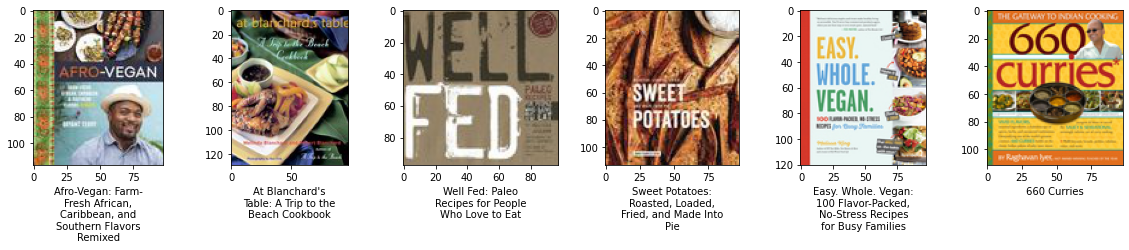

book_id  ...       est
12203  18209510  ...  4.162547
11509    544890  ...  4.086573
7232   13244078  ...  4.028115
23317  33516860  ...  3.996800
3539   25810668  ...  3.991369
7029    2575111  ...  3.988522

[6 rows x 5 columns]

In [46]:
#User A recomendations
hybrid('7b2e5fe9fd353fecf3eeebb4850b88d3', "Carla's Comfort Foods: Favorite Dishes from Around the World")

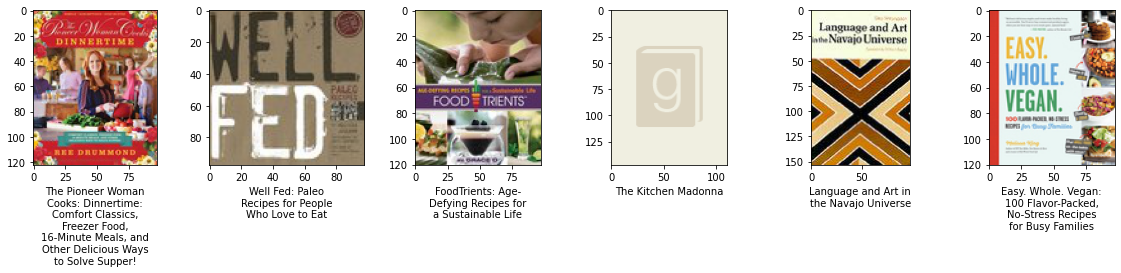

book_id  ...       est
1796   24903909  ...  4.391890
7232   13244078  ...  4.357575
7026   13607773  ...  4.250063
11526   1196021  ...  4.234551
12897   1245260  ...  4.221425
3539   25810668  ...  4.213528

[6 rows x 5 columns]

In [47]:
#User B recomendations
hybrid('01ec1a320ffded6b2dd47833f2c8e4fb', "Carla's Comfort Foods: Favorite Dishes from Around the World")

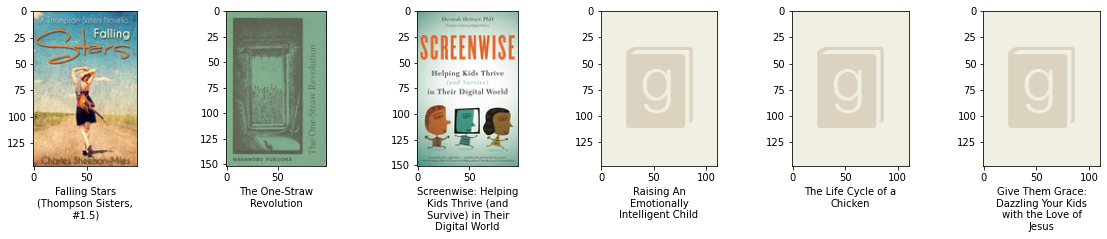

book_id  ...       est
4048   18480438  ...  4.467017
6694     976905  ...  4.445178
6387   28695588  ...  4.280594
12766    213186  ...  4.267140
23710  14526602  ...  4.244676
5464   12113309  ...  4.217166

[6 rows x 5 columns]

In [48]:
#User B recomendation with a different book
hybrid('01ec1a320ffded6b2dd47833f2c8e4fb', "Motivate Your Child: A Christian Parent's Guide to Raising Kids Who Do What They Need to Do Without Being Told")

**We see that for our hybrid recommender, we get (almost) different recommendations for different users although the book is the same. But maybe we can make it better through following steps:**

1. Use our improved_recommendations technique , that we used in the  Content Based seciton above
2. Combine it with the user estimations, by dividing their summation by 2
3. Finally, put the result into a new feature score


In [49]:
def improved_hybrid(user_id, title, n=6):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:51]
    book_indices = [i[0] for i in sim_scores]
    
    df = goodreads_book2.iloc[book_indices][['book_id', 'title', 'ratings_count', 'average_rating','image_url']]
    v = df['ratings_count']
    m = df['ratings_count'].quantile(0.60)
    R = df['average_rating']
    C = df['average_rating'].mean()
    df['weighted_rating'] = (R*v + C*m) / (v + m)
    
    df['est'] = df['book_id'].apply(lambda x: svd.predict(user_id, x).est)
    
    df['score'] = (df['est'] + df['weighted_rating']) / 2
    df = df.sort_values('score', ascending=False)
    temp=df.head(n)
    plt.figure(figsize=(20,20)) # specifying the overall grid size   

    tt=[]
    for i in temp['title']:
      tt.append(i)
      
    img_array=[]
    for i in temp['image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        img_array.append(img)


    for i in range(len(img_array)):
        plt.subplot(6,6,i+1)    # the number of images in the grid is 5*5 (25)
        label='\n'.join(wrap(tt[i], 20))
        plt.xlabel(label)
        plt.imshow(img_array[i])
 
 
    plt.show()
    return df[['book_id', 'title','ratings_count', 'average_rating','score']].head(n)

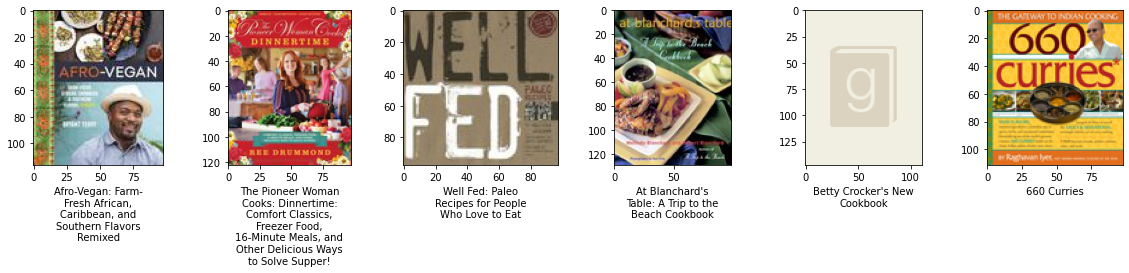

book_id  ...     score
12203  18209510  ...  4.168317
1796   24903909  ...  4.160896
7232   13244078  ...  4.131186
11509    544890  ...  4.085502
19027   1586060  ...  4.068565
7029    2575111  ...  4.047091

[6 rows x 5 columns]

In [50]:
#User A improved hybrid recommendation
improved_hybrid('7b2e5fe9fd353fecf3eeebb4850b88d3', "Carla's Comfort Foods: Favorite Dishes from Around the World")

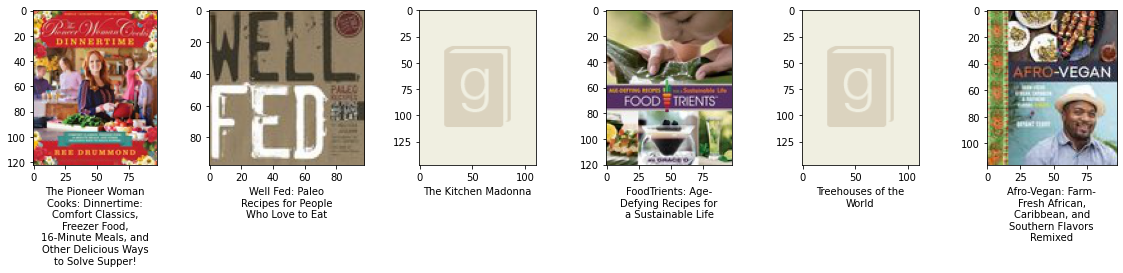

book_id  ...     score
1796   24903909  ...  4.362758
7232   13244078  ...  4.295916
11526   1196021  ...  4.221048
7026   13607773  ...  4.185195
18782    463017  ...  4.167945
12203  18209510  ...  4.159146

[6 rows x 5 columns]

In [51]:
#User B hybrid improved recommendation
improved_hybrid('01ec1a320ffded6b2dd47833f2c8e4fb', "Carla's Comfort Foods: Favorite Dishes from Around the World")

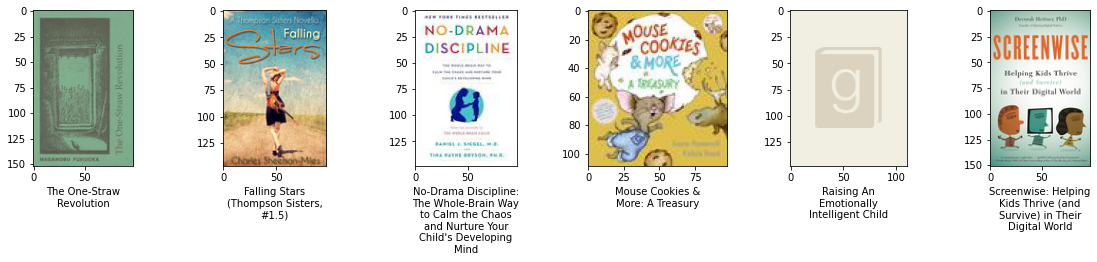

book_id  ...     score
6694     976905  ...  4.401291
4048   18480438  ...  4.221840
6901   20342499  ...  4.216364
12297    150987  ...  4.197813
12766    213186  ...  4.193419
6387   28695588  ...  4.175375

[6 rows x 5 columns]

In [52]:
#User B improved hybrid recommendation with another book
improved_hybrid('01ec1a320ffded6b2dd47833f2c8e4fb', "Motivate Your Child: A Christian Parent's Guide to Raising Kids Who Do What They Need to Do Without Being Told")